# Predicting heart disease using machine learning
This notebook looks into using Python-based machine learning and data science libraries in an attempt to build a machine learning model  capable of predicting whether or not someone has a heart disease based on their medical attributes.

We are going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have a heart disease?

## 2. Data
The original data came from Cleavland data from the UCI Machine Learning Repository. 
There is also a version available on Kaggle: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether the patient has a heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create data dictionary**

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation     or depression of > 0.05 mV)
    * Value 2: showing probable or definite left ventricular hypertrophy by Estes'     criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
    and the label
14. target: 0 = no disease, 1 = disease


## Preparing the tools
We are going to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [135]:
# Import all the tools we need

# Regular EDA and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit - learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

### Load Data

In [136]:
df = pd.read_csv('heart-disease.csv')
df.shape

(303, 14)

## Data exploration (EDA)

The goal is to find more about the data and become a subject matter expert on the dataset.

1. What questions are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. Whats missing from the data and how do you deal with it ?
4. What are the outliers and why you should care about them ?
5. How can you add, change or remove features to get more out of your data ?

In [137]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [138]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [139]:
# How many of each classes we have
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

From above we can say that this is a balanced classification problem.

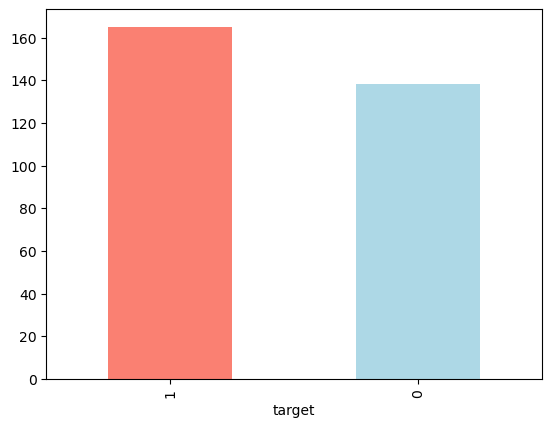

In [140]:
df['target'].value_counts().plot(kind = 'bar', color = ['salmon', 'lightblue']);

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [142]:
#Check missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [143]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Comparing columns
### Heart Disease Frequency Accorrding to sex

In [144]:
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

We now see we I have unbalanced sex variable as males outweigh females

In [145]:
# Compare target column with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


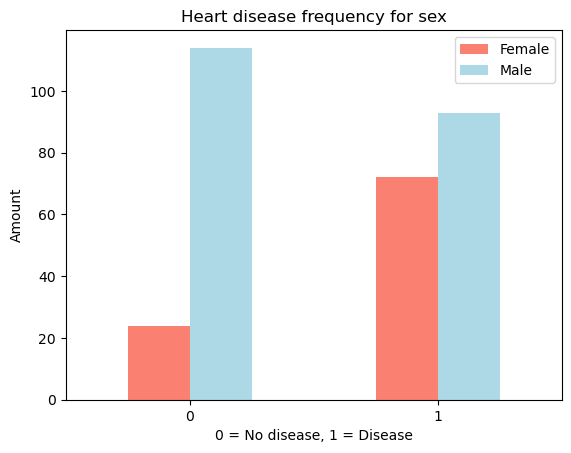

In [146]:
# create a plot of this cross tab
pd.crosstab(df.target, df.sex).plot(kind = 'bar', color = ['salmon','lightblue'])
plt.title('Heart disease frequency for sex')
plt.xlabel('0 = No disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation = 0);

**We can form some intuitions from here based on our data:**
1. Females are 3 times more likely to have heart disease as proportion of females is higher than males
2. Overall the incidence of disease is higher in our dataset.

In [147]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Age vs Max heart Rate for Heart Disease

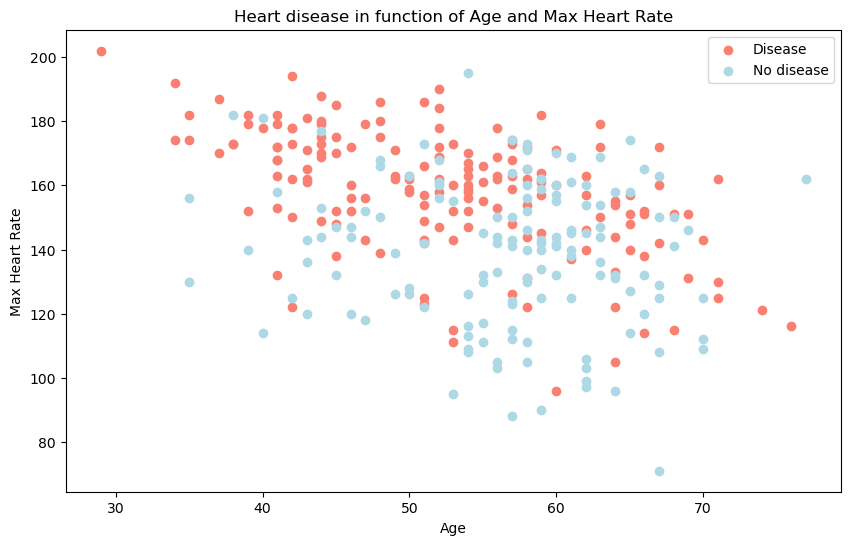

In [148]:
# Create another figure
plt.figure(figsize = (10, 6))

# Scatter with positive examples
plt.scatter(df.age[df.target ==1], df.thalach[df.target == 1], c = 'salmon');

# Scatter with negative examples
plt.scatter(df.age[df.target ==0], df.thalach[df.target == 0], c = 'lightblue');

# Add some more info
plt.title('Heart disease in function of Age and Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Disease', 'No disease']);

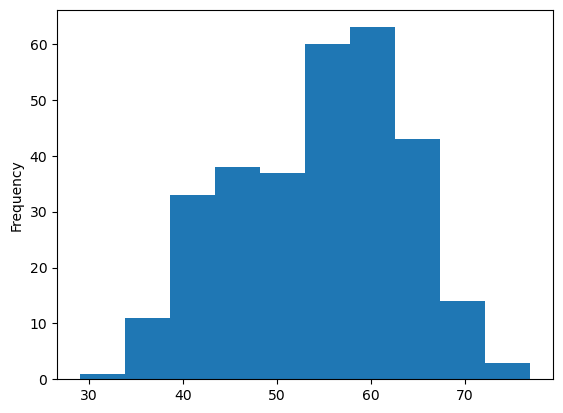

In [149]:
# Check the distribution of Age with the histogram
df.age.plot.hist();

### Heart disease frequency per chest pain type

3. cp: chest pain type
    * Value 0: typical angina
    * Value 1: atypical angina
    * Value 2: non-anginal pain
    * Value 3: asymptomatic

In [150]:
pd.crosstab(df['cp'], df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


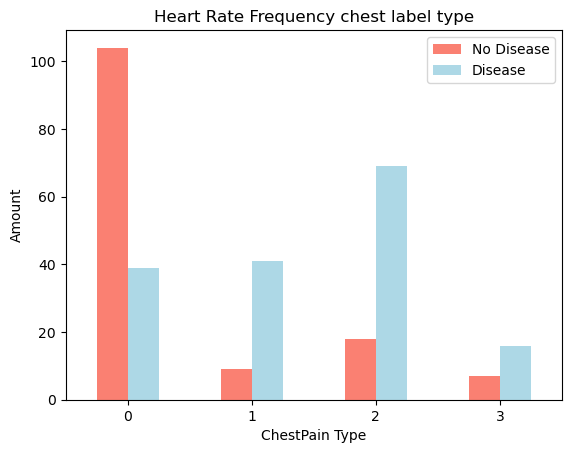

In [151]:
# Make the cross tab more visual
pd.crosstab(df['cp'], df['target']).plot(kind = 'bar', color = ['salmon', 'lightblue']);
# Add some communication

plt.title('Heart Rate Frequency chest label type')
plt.xlabel('ChestPain Type')
plt.ylabel('Amount')
plt.legend(['No Disease', 'Disease']);
plt.xticks(rotation = 0);

In [152]:
# Make a corr matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

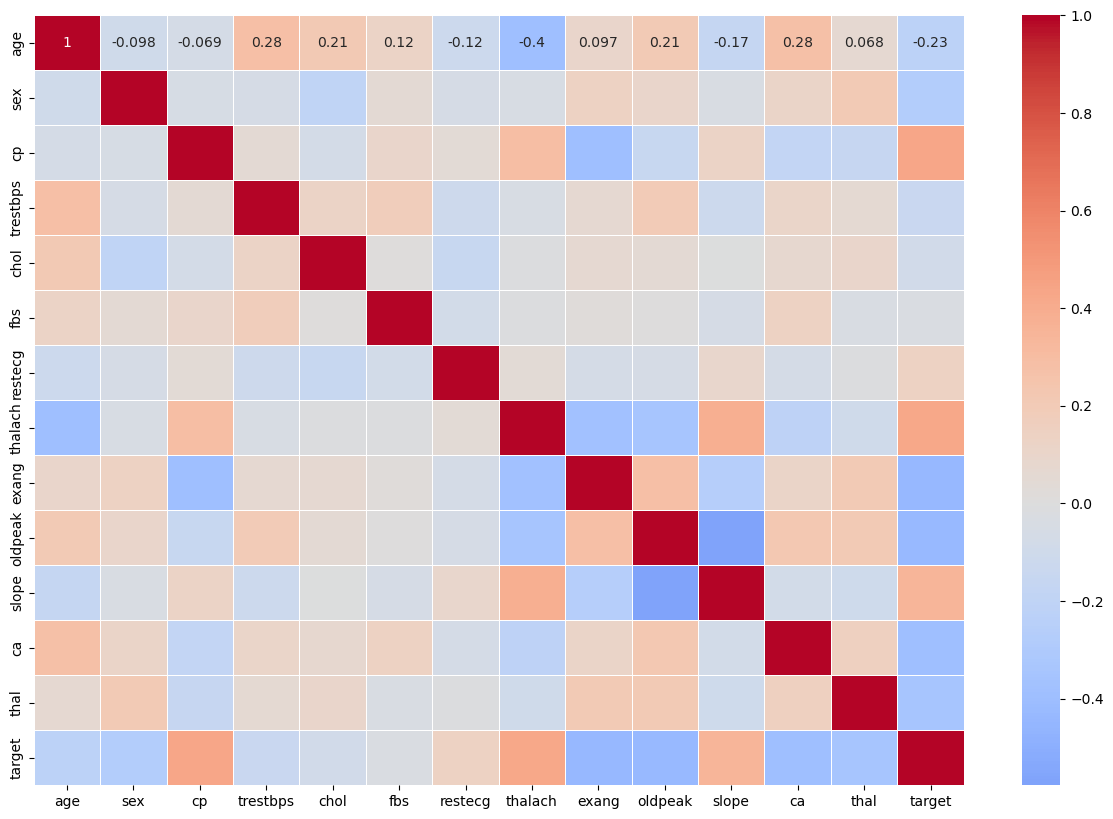

In [155]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(corr_matrix,  annot=True, linewidths = 0.5, cmap = 'coolwarm', center = 0)


Unfortunately after trying to upgrade/ downgrade versions of multiple libraries the code here for sns.heatmap didnt work to show the rest of corr coefficients. At the end I figured out that this was some of the issue with my macos version. Can't really help that but sure the code is correct. ! Nonetheless we can make our analysis from the corr matrix we obtained above ..

## 5.0 Modelling

In [157]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [158]:
# Split data into X and y
X = df.drop('target', axis = 1)
y = df.target

In [159]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [160]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [172]:
# Split data into train and test size
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [173]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3


In [174]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Now we've got our data into test and train split, its time to build a machine learning model.

We'll train it on the train set and then evaluate it on the test set.

We are going to try 3 different machine learning models:
1. Logistic Regression
2. Kneighbours Classifier
3. RandomForestClassifier


In [184]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [185]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores


/Users/ali/Desktop/ML/heart-disease-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

<Axes: >

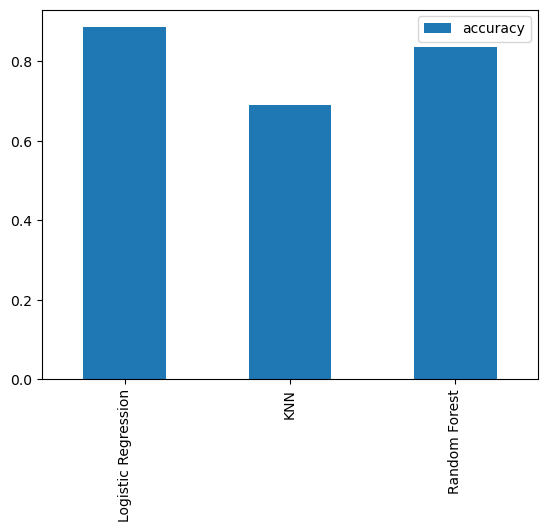

In [186]:
### Model Comparison
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar()

Now we have a basline model with a decent accuracy score but we cannot base our predictions on the baseline but sstrive to imporve it further.

Lets look at the following:
* Hyperparamter Tuning
* Feature Importance
* confusion Matrix
* cross- validation
* Recall
* F1 score
* Classification Report
* ROC curve
* Area under the curve (AUC)

### HyperParameter Tuning by hand


In [187]:
## Lets tune KNN

train_scores = []
test_scores = []

# create a list of different values for n_neighbors
neighbors = range(1,21)

#Initialize the KNN model
knn = KNeighborsClassifier()

# Loop through different neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the model
    knn.fit(X_train, y_train)

    #Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    #Update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    
    


Maximum KNN score on the test data: 75.41 %


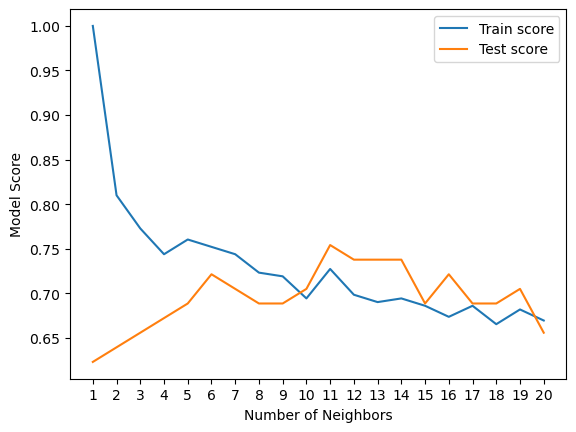

In [189]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of Neighbors')
plt.ylabel('Model Score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f} %')

## Hyperparameter Tuning with RandomizedSearchCV

we're going to tune:
* Logistic Regression()
* RandomForestClassifier()
...using RandomizedSearchCV

In [190]:
## Creating a hyperparameter grid for Logistic Regression
log_reg_grid = {'C': np.logspace(-4, 4, 20), 'solver': ['liblinear']}

## Creating a hyperparameter grid for RandomForestClassifier
rf_grid = {'n_estimators': np.arange(10,1000,50),
           'max_depth': [None, 3 , 5, 10],
           'min_samples_split': np.arange(2,20,2),
           'min_samples_leaf': np.arange(1,20,2)}


Now we have hyperparameters grids set up for each of our models, lets tune these to get the best results.

In [191]:
# Tune Logistic Regression

np.random.seed(42)

#Setup random hyperparameters search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                               cv = 5,
                               n_iter = 20,
                               verbose = True)

#Fit random hyperparameter search model for LogLogisticRegression
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [192]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [193]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned logistic regression lets do the same for RandomForestClassifier

In [194]:
# Set up random seed
np.random.seed(42)

#Set up random hyperparameter search for RandomForestClassifier

rs_rf_reg = RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                              cv = 5,
                              n_iter = 20,
                              verbose = True)

#Fit random hyperparameter search model for RandomForestClassifier

rs_rf_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [197]:
# Evaluate the randomized seach RandomForestClassifier model
rs_rf_reg.score(X_test, y_test)

0.8688524590163934

In [196]:
# Find the best hyperparameters
rs_rf_reg.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [198]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

Ohoo our logistic regression still performs the best.

 **Now we are going to drop our RandomForestClassifier model and focus on the Logistic Regression as it seems to be performing the best**

## HyperParameter Tuning with GridSearchCV

As our Logistic Regression performs best so far, we'll try and improve them again using GridSearchCV

In [200]:
# Different hyperparameters for our LogisticRegression model.
log_reg_grid = {'C': np.logspace(-4, 4, 30),
               'solver': ['liblinear']}

#Setup grid hyperparameters search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv = 5,
                         verbose = True)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [201]:
#Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [202]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

Even with increasing parameters the model's score is same

## Evaluating our tuned machine learning classification, beyond accuracy.
* ROC curve and AUC score
* Confusion Matrxi
* Classification report
* Precision
* Recall
* F1 score

 .. and it would be great if cross-validation was used where possible

 To make comparisons and evaluate our trained model, first we need to make predictions

In [204]:
#  Looking at predictions.
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [205]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

In [229]:
# To plot roc curve we need fpr, tpr which can be obtained from roc_curve
from sklearn.metrics import roc_curve
y_prob = gs_log_reg.predict_proba(X_test)
y_prob_positive = y_prob[:, 1:]
fpr, tpr, _ = roc_curve(y_test, y_prob_positive)

<Figure size 1500x1000 with 0 Axes>

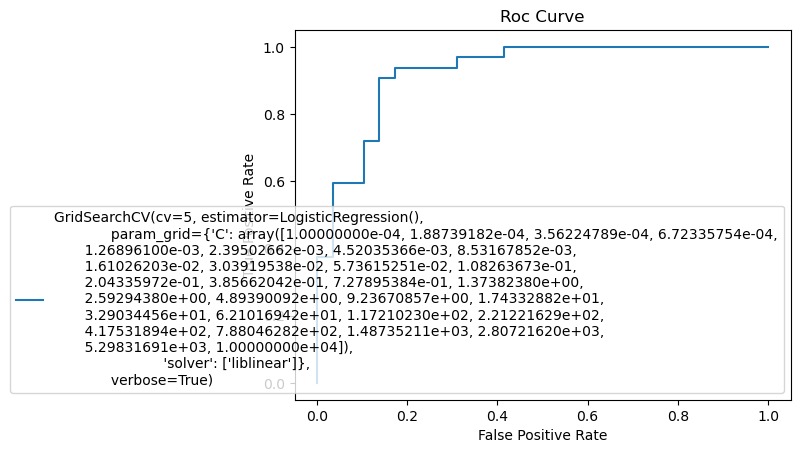

In [232]:
# Plot roc curve and calculate AUC curve
roc_display = RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = gs_log_reg, roc_auc=None)
plt.figure(figsize=(15,10))
roc_display.plot()
plt.title('Roc Curve')
plt.show();

In [233]:
#AUC score
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_prob_positive)
auc_score

0.925646551724138

In [224]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


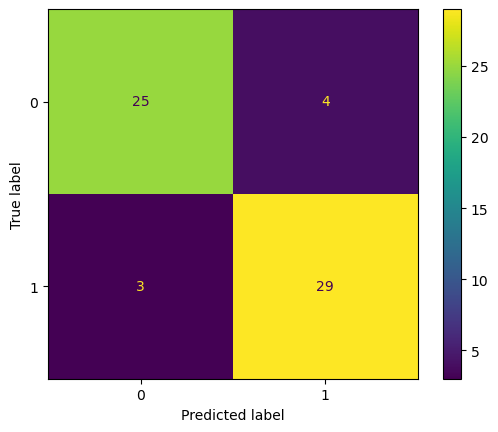

In [225]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [234]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation matrix using cross-validation

We are going to calculate precision, recall and f1_score using cross-validation .


In [236]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [237]:
# Create a new classifier with the best parameters.

clf = LogisticRegression(C = 0.20433597178569418, solver='liblinear')


In [241]:
# Cross-validated accuracy
cv_acc = cross_val_score(estimator=clf, X=X, y=y, scoring='accuracy', cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [243]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [245]:
# Cross-validated precision
cv_precision = cross_val_score(estimator=clf, X=X, y=y, scoring='precision', cv=5)
cv_precison = np.mean(cv_precison)
cv_precision

0.8207936507936507

In [247]:
# Cross-validated recall
cv_recall = cross_val_score(estimator=clf, X=X, y=y, scoring='recall', cv=5)
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [249]:
# Cross-validated f1
cv_f1 = cross_val_score(estimator=clf, X=X, y=y, scoring='f1', cv=5)
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

<Axes: >

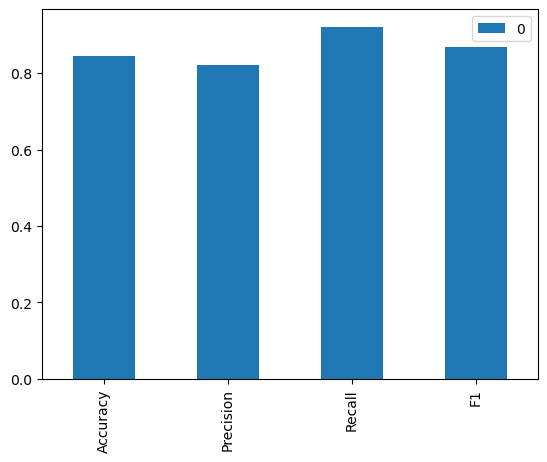

In [253]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          'Recall': cv_recall,
                          'F1': cv_f1}, index = [0])
cv_metrics.T.plot.bar()

### Feature Importance

Feature importance is another way of saying 'which features contributed most to the outcomes and how did they contribute ?'

Finding feature importance is different for every model.

In [254]:
# Fit an instance of Logistic Regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [255]:
clf = LogisticRegression(C = 0.20433597178569418, solver= 'liblinear')
clf.fit(X_train, y_train)

LogisticRegression(C=0.20433597178569418, solver='liblinear')

In [256]:
# Check coeff_
clf.coef_

array([[ 0.00316728, -0.8604465 ,  0.66067041, -0.01156993, -0.00166374,
         0.04386107,  0.31275846,  0.02459361, -0.60413079, -0.56862804,
         0.45051628, -0.63609897, -0.67663372]])

In [258]:
# Match coef's of features to columns
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict
                     

{'age': 0.0031672800489608455,
 'sex': -0.8604464974271708,
 'cp': 0.6606704082728109,
 'trestbps': -0.01156993196274824,
 'chol': -0.0016637440923087717,
 'fbs': 0.04386107313075342,
 'restecg': 0.3127584615862929,
 'thalach': 0.02459361332045646,
 'exang': -0.6041307948760266,
 'oldpeak': -0.568628039197438,
 'slope': 0.4505162753782247,
 'ca': -0.636098965095586,
 'thal': -0.6766337239240338}

<Axes: title={'center': 'Feature Importance'}>

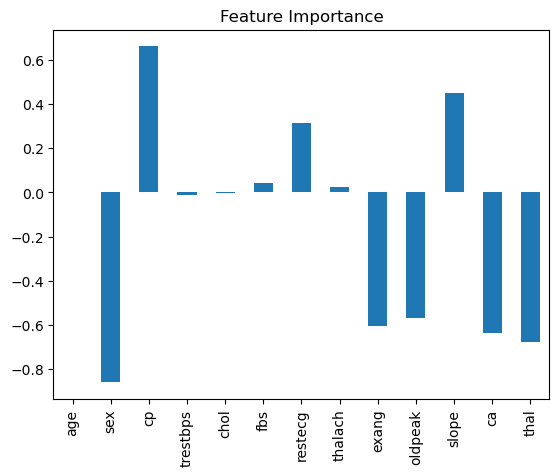

In [259]:
# Visualise feature importance
feature_df = pd.DataFrame(features_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature Importance', legend = False)

In [260]:
pd.crosstab(df['sex'], df['target'])

target,0,1
sex,,
0,24,72
1,114,93


In [261]:
pd.crosstab(df['slope'], df['target'])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope: 
the slope of the peak exercise ST segment 
* -- Value 0: upsloping 
* -- Value 1: flat 
* -- Value 2: downsloping

## 6. Experimentation
If you haven't hit evaluation metric yet.. ask yourself..

* Could you collect more data
* Could you try a better model ? like Catboost or XGBoost.
* Could you improve the current models ? (beyond what we have done so far)
* If your model is good enough how can you share the model ?